In [55]:
import pymysql
connection = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="superandrey2004",
    database="DataWarehouse"
)
cursor = connection.cursor()

In [56]:
cursor = connection.cursor()
query ="""
SELECT f.life_ladder, f.gdp_per_capita, f.social_support, f.life_expancy, f.freedom_choice,
            c.average_temperature, c.average_temperature_uncertainty, t.event_name, t.extended
FROM fact_hapiness_analysis AS f
JOIN dim_climat AS c ON f.climat_id = c.climat_id
LEFT JOIN dim_terrorism AS t ON f.event_id = t.event_id
JOIN dim_country AS ct ON f.country_id = ct.country_id
"""
cursor.execute(query)
data = cursor.fetchall()


In [57]:
import pandas as pd
columns = ['life_ladder', 'gdp_per_capita', 'social_support', 'life_expancy', 'freedom_choice',
           'average_temperature', 'average_temperature_uncertainty',
           'event_name', 'extended']
df = pd.DataFrame(data, columns=columns)

df['isTerror'] = df['event_name'].apply(lambda x: 1 if pd.notnull(x) else 0)

df = df.drop(columns=['event_name'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28808 entries, 0 to 28807
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   life_ladder                      10475 non-null  object 
 1   gdp_per_capita                   10475 non-null  object 
 2   social_support                   10475 non-null  object 
 3   life_expancy                     10475 non-null  object 
 4   freedom_choice                   10475 non-null  object 
 5   average_temperature              28808 non-null  object 
 6   average_temperature_uncertainty  28808 non-null  object 
 7   extended                         1494 non-null   float64
 8   isTerror                         28808 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.0+ MB


In [58]:
df.head()



,life_ladder,gdp_per_capita,social_support,life_expancy,freedom_choice,average_temperature,average_temperature_uncertainty,extended,isTerror
0,5.754,9.842,0.855,62.660,0.712,31.051,0.961,0.0,1
1,None,None,None,None,None,16.853,0.297,0.0,1
2,3.559,9.239,0.675,60.480,0.474,30.269,0.835,0.0,1
3,4.522,8.281,0.653,56.980,0.679,18.631,0.175,0.0,1
4,5.146,8.220,0.684,56.560,0.756,19.244,0.137,0.0,1


In [59]:
import numpy as np
df['extended'] = df['extended'].fillna(0)
noNanData = list(df.columns)[0:5]
for i in noNanData:
    df = df.dropna()
numeric_columns = ['life_ladder', 'gdp_per_capita', 'social_support', 'life_expancy',
                   'freedom_choice', 'average_temperature', 'average_temperature_uncertainty']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')



In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10475 entries, 0 to 28806
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   life_ladder                      10475 non-null  float64
 1   gdp_per_capita                   10475 non-null  float64
 2   social_support                   10475 non-null  float64
 3   life_expancy                     10475 non-null  float64
 4   freedom_choice                   10475 non-null  float64
 5   average_temperature              10475 non-null  float64
 6   average_temperature_uncertainty  10475 non-null  float64
 7   extended                         10475 non-null  float64
 8   isTerror                         10475 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 818.4 KB


In [61]:
df.head(10)

,life_ladder,gdp_per_capita,social_support,life_expancy,freedom_choice,average_temperature,average_temperature_uncertainty,extended,isTerror
0,5.754,9.842,0.855,62.66,0.712,31.051,0.961,0.0,1
2,3.559,9.239,0.675,60.48,0.474,30.269,0.835,0.0,1
3,4.522,8.281,0.653,56.98,0.679,18.631,0.175,0.0,1
4,5.146,8.220,0.684,56.56,0.756,19.244,0.137,0.0,1
5,5.146,8.220,0.684,56.56,0.756,19.244,0.137,0.0,1
8,5.786,8.270,0.571,56.20,0.364,29.965,0.175,0.0,1
9,3.783,7.705,0.521,52.24,0.531,15.031,0.360,0.0,1
10,4.415,8.970,0.838,65.86,0.736,28.292,0.307,0.0,1
11,6.300,9.645,0.906,65.94,0.847,27.924,0.169,0.0,1
14,4.402,7.540,0.552,51.20,0.679,28.145,0.357,0.0,1


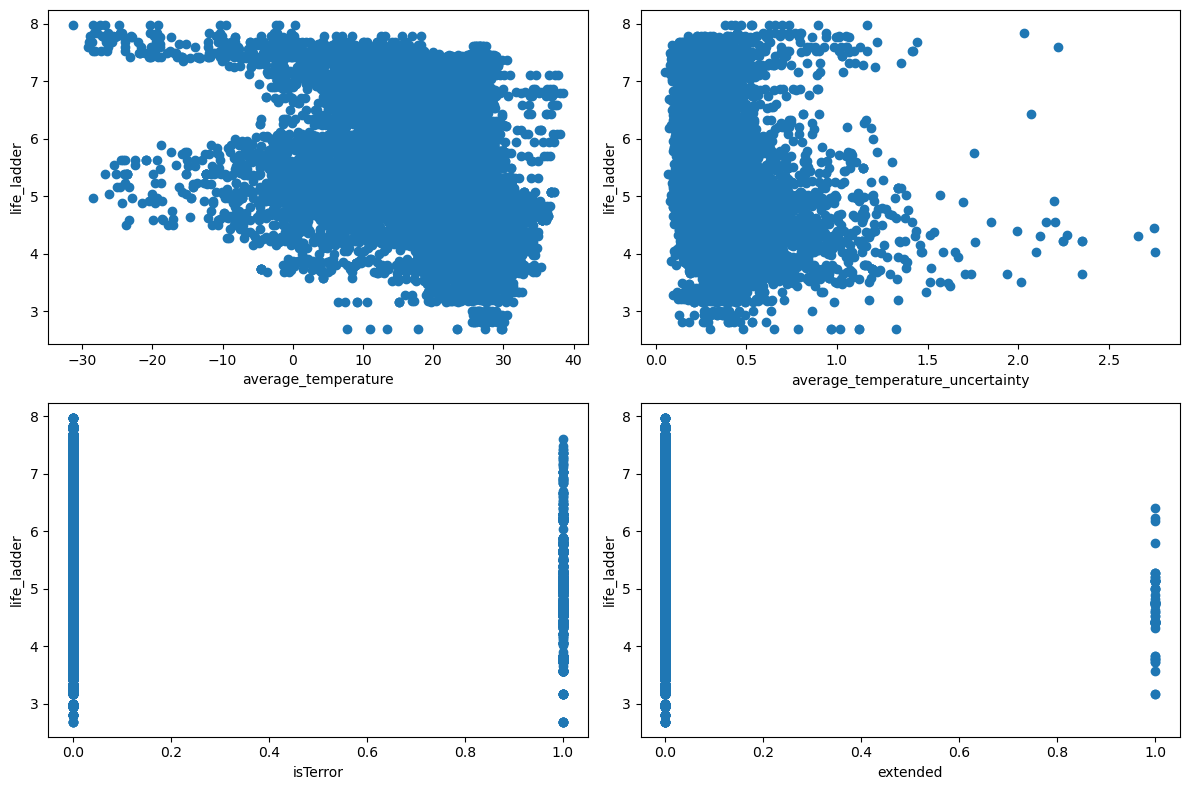

In [62]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(df['average_temperature'], df['life_ladder'], 'o')
axs[0, 0].set_xlabel('average_temperature')
axs[0, 0].set_ylabel('life_ladder')

axs[0, 1].plot(df['average_temperature_uncertainty'], df['life_ladder'], 'o')
axs[0, 1].set_xlabel('average_temperature_uncertainty')
axs[0, 1].set_ylabel('life_ladder')

axs[1, 0].plot(df['isTerror'], df['life_ladder'], 'o')
axs[1, 0].set_xlabel('isTerror')
axs[1, 0].set_ylabel('life_ladder')

axs[1, 1].plot(df['extended'], df['life_ladder'], 'o')
axs[1, 1].set_xlabel('extended')
axs[1, 1].set_ylabel('life_ladder')

plt.tight_layout()
plt.show()



In [63]:
from sklearn.model_selection import train_test_split
X = df[['average_temperature', 'average_temperature_uncertainty', 'isTerror', 'extended']]
y = df['life_ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



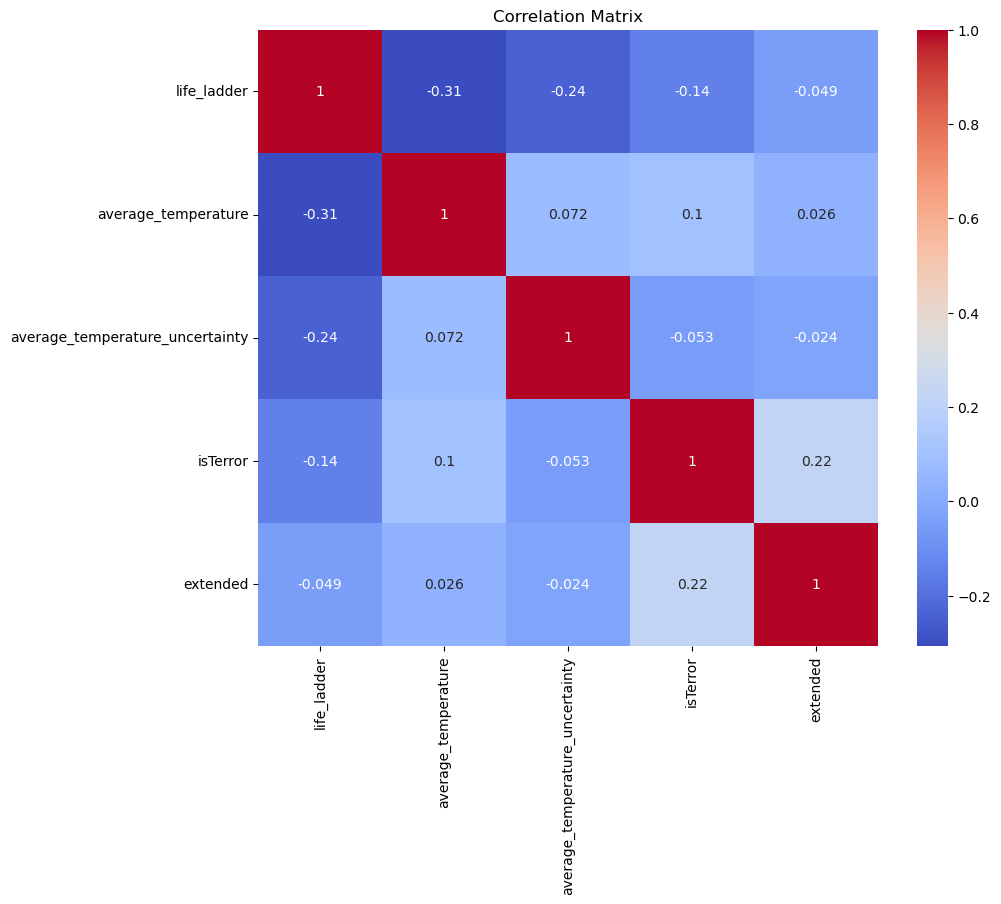

In [64]:
import seaborn as sns
# Calculate the correlation matrix
data = pd.concat([y, X], axis=1)
correlation_matrix = data.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [65]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
scores1 = cross_val_score(model1, X_test, y_test, cv=10, scoring='r2')
r2_1_cross_val = scores1.mean()

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
y_pred2 = model2.predict(X_test_poly)
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
scores2 = cross_val_score(model2, X_test_poly, y_test, cv=10, scoring='r2')
r2_2_cross_val = scores2.mean()


# Compare and select the best model
if r2_1 > r2_2 :
    best_model = model1
    best_model_name = 'Linear Regression'
else:
    best_model = model2
    best_model_name = 'Polynomial  Regression'

In [66]:

def find_best_degree(X_train, y_train, X_test, y_test, degrees):
    best_degree = 1
    best_score = -np.inf
    for degree in range(1, degrees+1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        score = model.score(X_test_poly, y_test)
        if score > best_score:
            best_score = score
            best_degree = degree
    
    return best_degree, best_score
best_degree, best_score = find_best_degree(X_train, y_train, X_test, y_test, degrees=10)
print("Best degree:", best_degree)
print("Best score:", best_score)

Best degree: 4
Best score: 0.17165296981077882


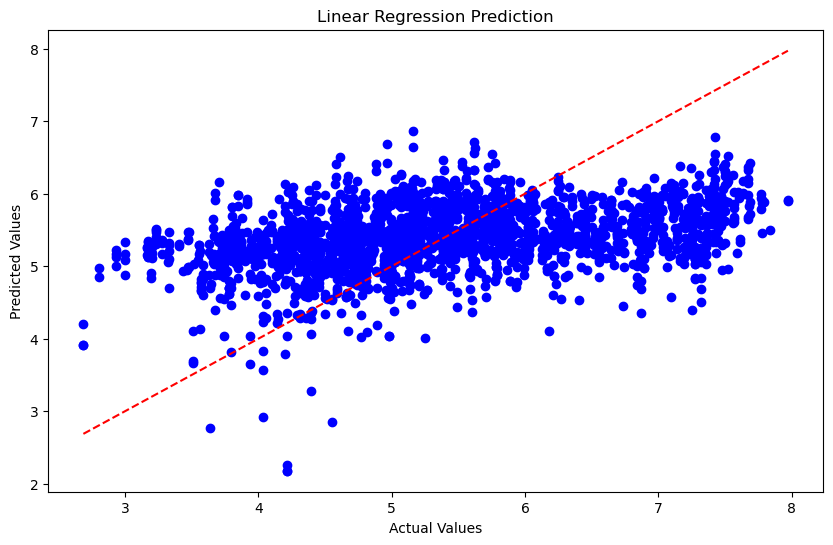

In [67]:
# Visualize the Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Prediction')
plt.show()


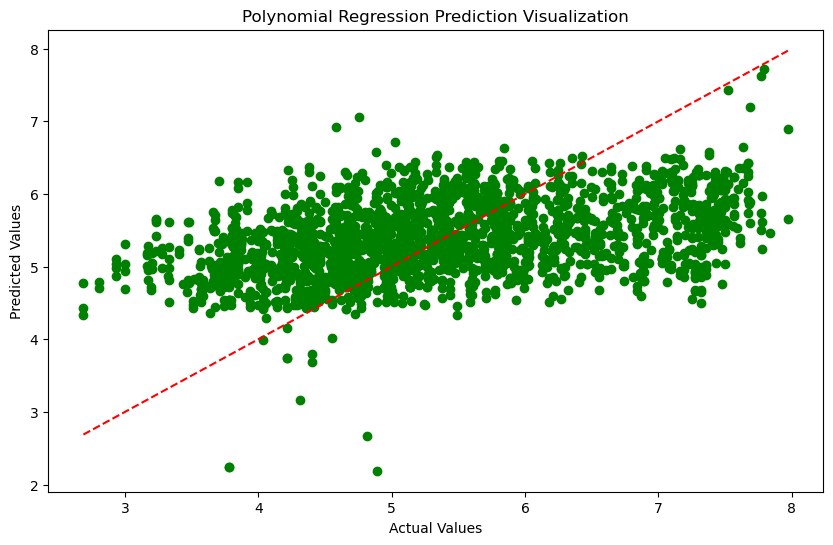

In [68]:
# Visualize the Polynomial Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Prediction Visualization')
plt.show()

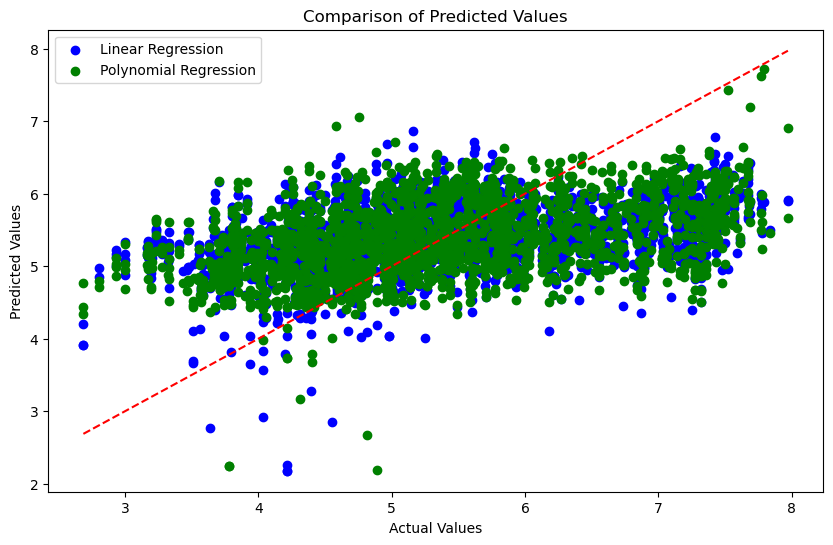

In [69]:
# Plotting the predictions and actual both methods values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred2, color='green', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()

In [73]:


print(f"Model 1 - Linear Regression:")
print(f"MSE: {mse1}")
print(f"MAE: {mae1}")
print(f"R^2: {r2_1}")
print(f"10-fold cross-validation: {r2_1_cross_val}")
print()

print(f"Model 2 - Polynomial Linear Regression:")
print(f"MSE: {mse2}")
print(f"MAE: {mae2}")
print(f"R^2: {r2_2}")
print(f"10-fold cross-validation: {r2_2_cross_val}")
print()

# Print the best model
print(f"Best Model: {best_model_name}")


Model 1 - Linear Regression:
MSE: 1.0788252623227932
MAE: 0.853227254741046
R^2: 0.14355404457213383
10-fold cross-validation: 0.141258276973728

Model 2 - Polynomial Linear Regression:
MSE: 1.0434303489608339
MAE: 0.8346042180005813
R^2: 0.17165296981077882
10-fold cross-validation: 0.14953289224224695

Best Model: Polynomial  Regression


In [71]:
# Print the accuracy for each model
print(f"Model 1 - Linear Regression:")
print(f"Accuracy - testing: {int(model1.score(X_test, y_test)*100)}%")
print()
print(f"Accuracy - training: {int(model1.score(X_train, y_train)*100)}%")
print()

print(f"Model 2 - Polynomial  Regression:")
print(f"Accuracy - testing: {int(model2.score(X_test_poly, y_test)*100)}%")
print()
print(f"Accuracy - training: {int(model2.score(X_train_poly, y_train)*100)}%")
print()


Model 1 - Linear Regression:
Accuracy - testing: 14%

Accuracy - training: 16%

Model 2 - Polynomial  Regression:
Accuracy - testing: 17%

Accuracy - training: 21%



In [72]:
# Close the cursor and connection
cursor.close()
connection.close()